<a href="https://colab.research.google.com/github/ephiewang/Digital-Finance/blob/main/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Step 1: Install Required Libraries
!pip install pandas nltk transformers torch -quite


Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

no such option: -u


In [4]:
# Step 2: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
from datetime import datetime
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from transformers import AutoTokenizer, AutoModelForSequenceClassification, pipeline

nltk.download('vader_lexicon')
nltk.download('stopwords')

/usr/local/lib/python3.12/dist-packages/transformers/utils/generic.py:441: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  _torch_pytree._register_pytree_node(
/usr/local/lib/python3.12/dist-packages/transformers/utils/generic.py:309: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  _torch_pytree._register_pytree_node(
/usr/local/lib/python3.12/dist-packages/transformers/utils/generic.py:309: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  _torch_pytree._register_pytree_node(
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
url = "https://raw.githubusercontent.com/ephiewang/Digital-Finance/refs/heads/main/fintweet%20demo.csv"
df = pd.read_csv(url)

In [6]:
df

,id,text,timestamp,source,symbols,company_names,url,verified
0,1.020000e+18,VIDEO: “I was in my office. I was minding my o...,Wed Jul 18 21:33:26 +0000 2018,GoldmanSachs,GS,The Goldman Sachs,https://twitter.com/i/web/status/1019696670777...,True
1,1.020000e+18,The price of lumber $LB_F is down 22% since hi...,Wed Jul 18 22:22:47 +0000 2018,StockTwits,M,Macy's,https://twitter.com/i/web/status/1019709091038...,True
2,1.020000e+18,Who says the American Dream is dead? https://t...,Wed Jul 18 22:32:01 +0000 2018,TheStreet,AIG,American,https://buff.ly/2L3kmc4,True
3,1.020000e+18,Barry Silbert is extremely optimistic on bitco...,Wed Jul 18 22:52:52 +0000 2018,MarketWatch,BTC,Bitcoin,https://twitter.com/i/web/status/1019716662587...,True
4,1.020000e+18,How satellites avoid attacks and space junk wh...,Wed Jul 18 23:00:01 +0000 2018,Forbes,ORCL,Oracle,http://on.forbes.com/6013DqDDU,True
...,...,...,...,...,...,...,...,...
8984,1.020000e+18,RT @eWhispers: #earnings for the week $NFLX $...,Mon Jul 16 03:56:32 +0000 2018,TradeThePattern,CTAS,Cintas Corporation,NaN,False
8985,1.020000e+18,RT @eWhispers: #earnings for the week $NFLX $...,Mon Jul 16 03:57:30 +0000 2018,Trade_Striker,CTAS,Cintas Corporation,NaN,False
8986,1.020000e+18,@ausallcapguy @claudedwalker @PhanLawyers $DDR ?,Mon Jul 16 03:58:50 +0000 2018,EGPtony,DDR,DDR Corp.,NaN,False
8987,1.020000e+18,RT @smartmoneyact: Notable sales &amp; spreads...,Mon Jul 16 03:59:11 +0000 2018,elecnico93,MAT,Mattel,NaN,False


In [7]:
# Clean tweet text
def clean_text(text):
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'@\w+', '', text)     # Remove mentions
    text = re.sub(r'#\w+', '', text)     # Remove hashtags
    text = re.sub(r'[^A-Za-z\s]', '', text)  # Remove non-alphabetic characters
    text = text.lower().strip()
    return text

df['cleaned_text'] = df['text'].apply(clean_text)

In [8]:
# Step 4: Apply VADER
vader = SentimentIntensityAnalyzer()
df['vader_score'] = df['cleaned_text'].apply(lambda x: vader.polarity_scores(x)['compound'])


In [17]:
# Step 5: Apply Transformers-based Models
# FinBERT
#finbert_pipeline = pipeline("sentiment-analysis", model="ProsusAI/finbert", tokenizer="ProsusAI/finbert")
# Use a pipeline as a high-level helper
from transformers import pipeline

finbert_pipeline = pipeline(
    "text-classification",
    model="ProsusAI/finbert",
    truncation=True,
    max_length=512
)

df['finbert'] = df['cleaned_text'].apply(lambda x: finbert_pipeline(x)[0]['score'])

/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:949: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [18]:
# DistilBERT
distilbert_pipeline = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english")
df['distilbert'] = df['cleaned_text'].apply(lambda x: distilbert_pipeline(x)[0]['score'])


/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:949: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [19]:
# RoBERTa
roberta_pipeline = pipeline("sentiment-analysis", model="cardiffnlp/twitter-roberta-base-sentiment")
df['roberta'] = df['cleaned_text'].apply(lambda x: roberta_pipeline(x)[0]['score'])

/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:949: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

In [20]:
# Step 6: Convert timestamp to datetime and aggregate by month

# First, check the current datatype of the timestamp column
print("Current timestamp column type:", df['timestamp'].dtype)

# Convert the timestamp column to datetime format
try:
    # If timestamp is a string, convert to datetime
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    print("Successfully converted timestamp to datetime")
except Exception as e:
    print(f"Error converting timestamp: {e}")

    # If there was an error, inspect a sample of the timestamp values
    print("\nSample timestamp values:")
    print(df['timestamp'].head())

# Now try to create the month column
try:
    df['month'] = df['timestamp'].dt.to_period('M')
    df['day'] = df['timestamp'].dt.to_period('D')
    print("Successfully created month/date column")
except Exception as e:
    print(f"Error creating month column: {e}")

    # Alternative approach if the first one fails
    # Extract year and month using string operations if timestamp is in string format
    if isinstance(df['timestamp'].iloc[0], str):
        print("Trying alternative method with string parsing...")
        df['month'] = df['timestamp'].str[:7]  # Assuming format like "YYYY-MM-DD"
        print("Created month column using string extraction")

# Display the results
print("\nDataFrame with month column:")
print(df[['timestamp', 'month','day']].head())

Current timestamp column type: object


/tmp/ipython-input-2775333352.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['timestamp'] = pd.to_datetime(df['timestamp'])


Successfully converted timestamp to datetime
Successfully created month/date column

DataFrame with month column:
                  timestamp    month         day
0 2018-07-18 21:33:26+00:00  2018-07  2018-07-18
1 2018-07-18 22:22:47+00:00  2018-07  2018-07-18
2 2018-07-18 22:32:01+00:00  2018-07  2018-07-18
3 2018-07-18 22:52:52+00:00  2018-07  2018-07-18
4 2018-07-18 23:00:01+00:00  2018-07  2018-07-18


/tmp/ipython-input-2775333352.py:20: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['month'] = df['timestamp'].dt.to_period('M')
/tmp/ipython-input-2775333352.py:21: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['day'] = df['timestamp'].dt.to_period('D')


In [21]:

# Aggregate sentiment scores
agg_df = df.groupby('day').agg({
    'vader_score': 'mean',
}).reset_index()

In [22]:
agg_df

,day,vader_score
0,2018-02-23,0.296000
1,2018-07-08,-0.080145
2,2018-07-09,0.064554
3,2018-07-10,0.095819
4,2018-07-11,0.086584
5,2018-07-12,0.104001
6,2018-07-13,0.084893
7,2018-07-14,0.074035
8,2018-07-15,0.070191
9,2018-07-16,0.050713


In [23]:
agg_df['day_str'] = agg_df['day'].astype(str)

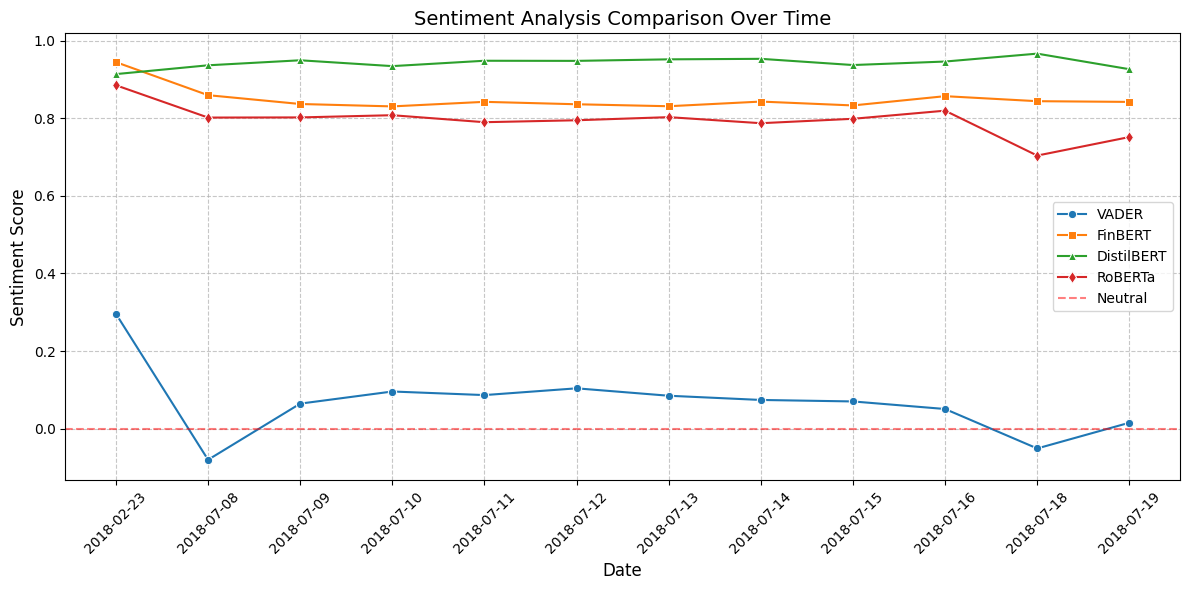

In [24]:
# Plot improved sentiment over time with all models
# First aggregate all sentiment models
agg_df = df.groupby('day').agg({
    'vader_score': 'mean',
    'finbert': 'mean',
    'distilbert': 'mean',
    'roberta': 'mean'
}).reset_index()

# THEN convert Period objects to strings for better plotting
agg_df['day_str'] = agg_df['day'].astype(str)

# Create the enhanced plot
plt.figure(figsize=(12, 6))

# Plot all sentiment models
sns.lineplot(data=agg_df, x='day_str', y='vader_score', marker='o', label='VADER')
sns.lineplot(data=agg_df, x='day_str', y='finbert', marker='s', label='FinBERT')
sns.lineplot(data=agg_df, x='day_str', y='distilbert', marker='^', label='DistilBERT')
sns.lineplot(data=agg_df, x='day_str', y='roberta', marker='d', label='RoBERTa')

# Add neutral sentiment reference line
plt.axhline(y=0, color='red', linestyle='--', alpha=0.5, label='Neutral')

# Improve styling
plt.title('Sentiment Analysis Comparison Over Time', fontsize=14)
plt.ylabel('Sentiment Score', fontsize=12)
plt.xlabel('Date', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(loc='best')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [ ]:

import ace_tools as tools; tools.display_dataframe_to_user(name="Financial Tweets Sentiment", dataframe=df)